In [1]:
%matplotlib notebook

#Import Libraries
import tensorflow as tf
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time

import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

from models import save_model, generator, generate_model, plot_performance

Using TensorFlow backend.


In [2]:
X_load = np.load('../data/fake_data_realistic/X.npy')
Y_load = np.load('../data/fake_data_realistic/Y.npy')

res = tf.one_hot(Y_load, depth=2)
with tf.Session() as sess:
    Y_load = (sess.run(res))

split_index = int(X_load.shape[0]*0.8)
    
X_train = X_load[:split_index]
Y_train = Y_load[:split_index]
X_val = X_load[split_index:]
Y_val = Y_load[split_index:]


class_weight = {0: 1., 1: 10.,}

<IPython.core.display.Javascript object>


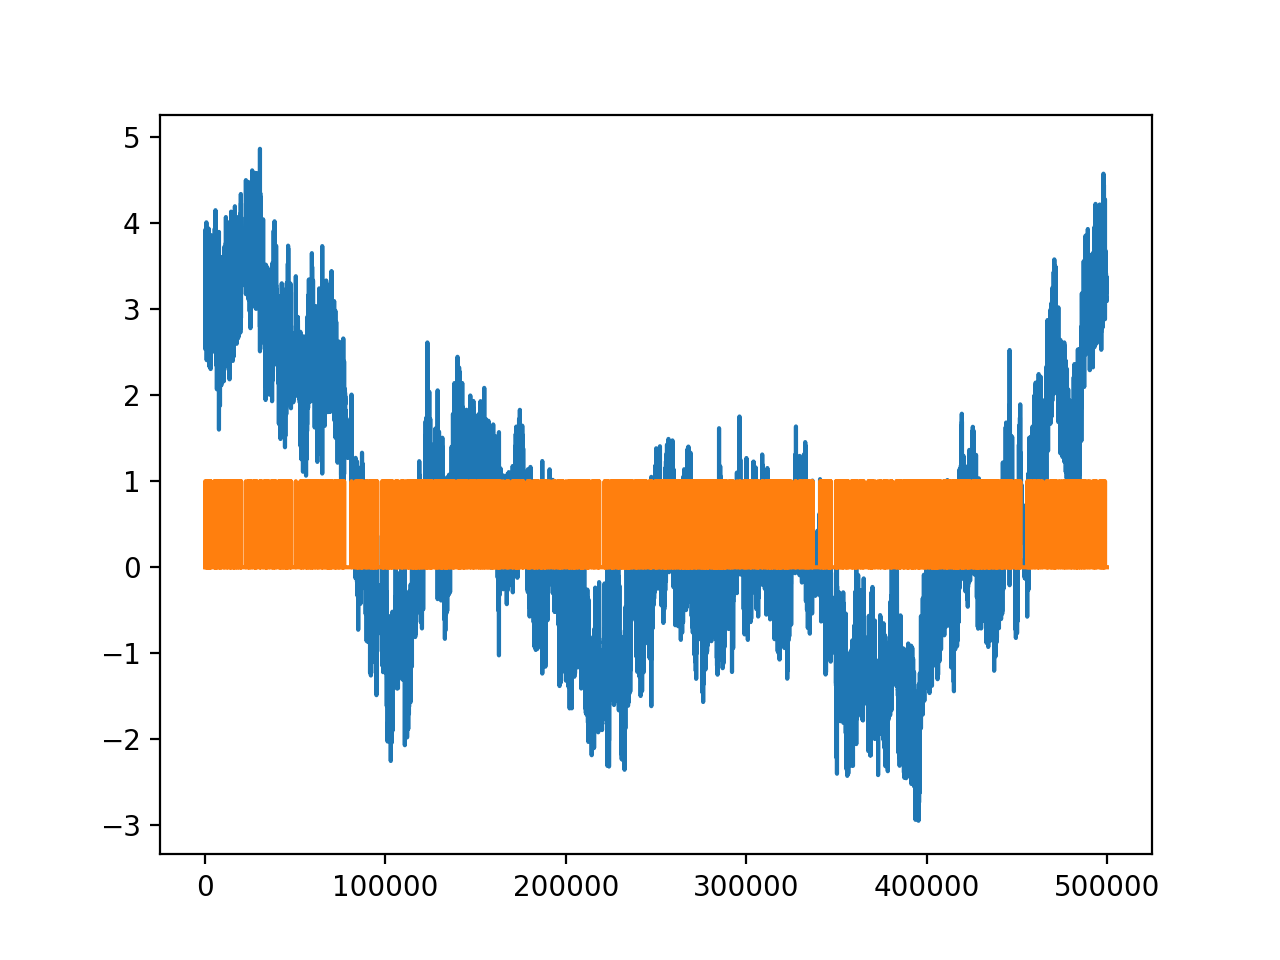

In [3]:


plt.figure()
plt.plot(X_load)
plt.plot(np.argmax(Y_load, axis=1))
plt.show()

In [4]:
batch_size = 1000
n_hidden = 50
n_dim = 1
input_shape = (n_hidden, n_dim)


model = generate_model(input_shape)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 6)             48        
_________________________________________________________________
average_pooling1d_1 (Average (None, 25, 6)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 25, 12)            516       
_________________________________________________________________
average_pooling1d_2 (Average (None, 12, 12)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 12)            1020      
_________________________________________________________________
average_pooling1d_3 (Average (None, 6, 12)             0         
__________

In [5]:
train_generator = generator(X_train, Y_train, batch_size, n_hidden)
validate_generator = generator(X_val, Y_val, batch_size, n_hidden)

history = model.fit_generator(train_generator,
                              steps_per_epoch=1000,
                              epochs=10, 
                              verbose=1,
                              validation_data=validate_generator,
                              validation_steps=1000,
                              class_weight=class_weight)

save_model(model)

Epoch 1/10
1000/1000 [==============================] - 105s 105ms/step - loss: 1.1984 - acc: 0.9095 - val_loss: 0.5261 - val_acc: 0.9197
Epoch 2/10
1000/1000 [==============================] - 105s 105ms/step - loss: 1.1895 - acc: 0.9181 - val_loss: 0.5810 - val_acc: 0.9194
Epoch 3/10
1000/1000 [==============================] - 114s 114ms/step - loss: 1.1884 - acc: 0.9184 - val_loss: 0.5932 - val_acc: 0.9200
Epoch 4/10
1000/1000 [==============================] - 108s 108ms/step - loss: 0.8893 - acc: 0.9323 - val_loss: 0.0843 - val_acc: 0.9822
Epoch 5/10
1000/1000 [==============================] - 107s 107ms/step - loss: 0.2841 - acc: 0.9840 - val_loss: 0.1077 - val_acc: 0.9748
Epoch 6/10
1000/1000 [==============================] - 116s 116ms/step - loss: 0.2134 - acc: 0.9847 - val_loss: 0.0809 - val_acc: 0.9792
Epoch 7/10
1000/1000 [==============================] - 127s 127ms/step - loss: 0.2358 - acc: 0.9836 - val_loss: 0.0665 - val_acc: 0.9821
Epoch 8/10
1000/1000 [============

<IPython.core.display.Javascript object>


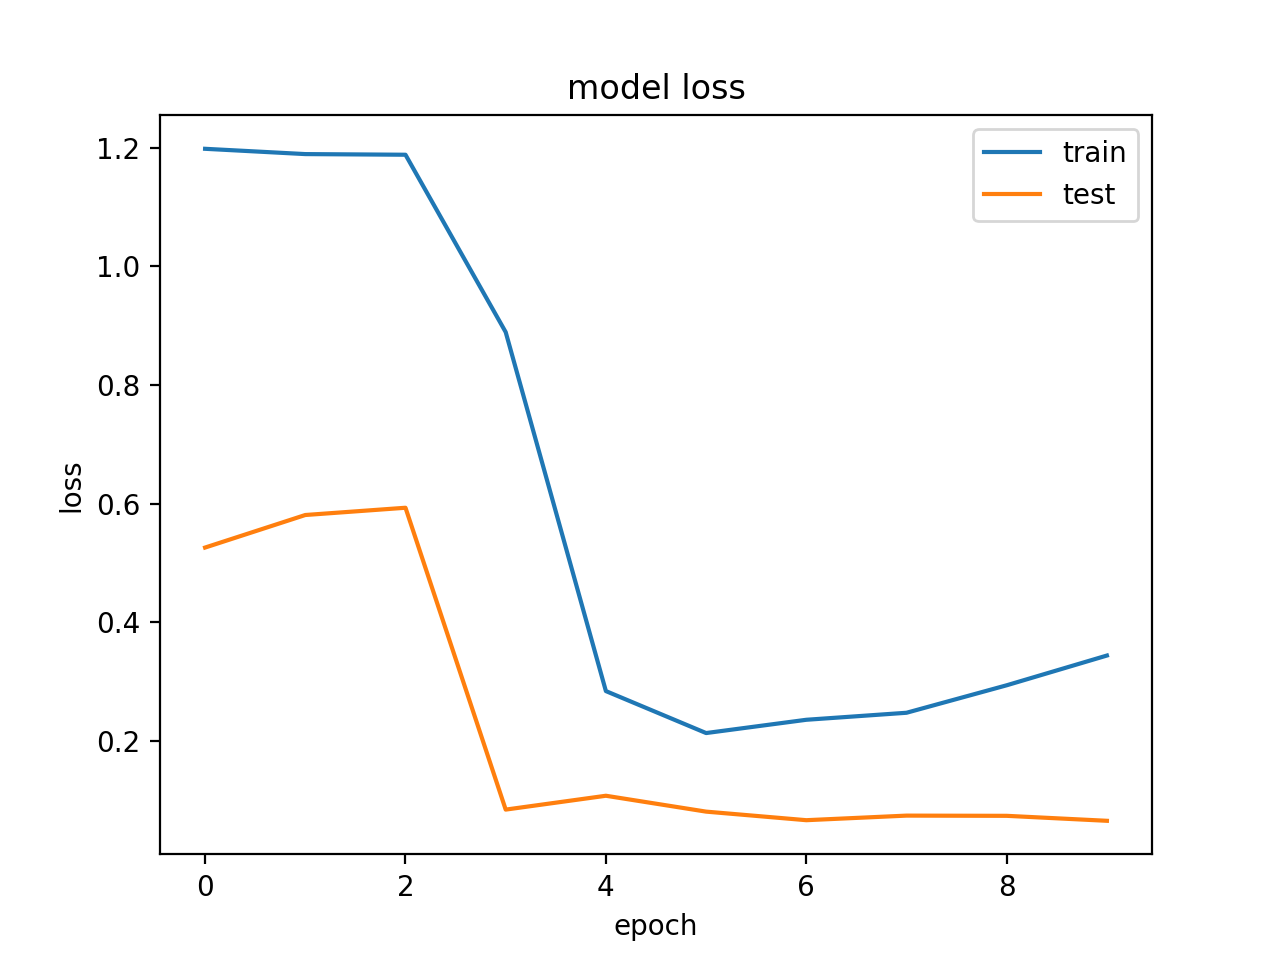

<IPython.core.display.Javascript object>


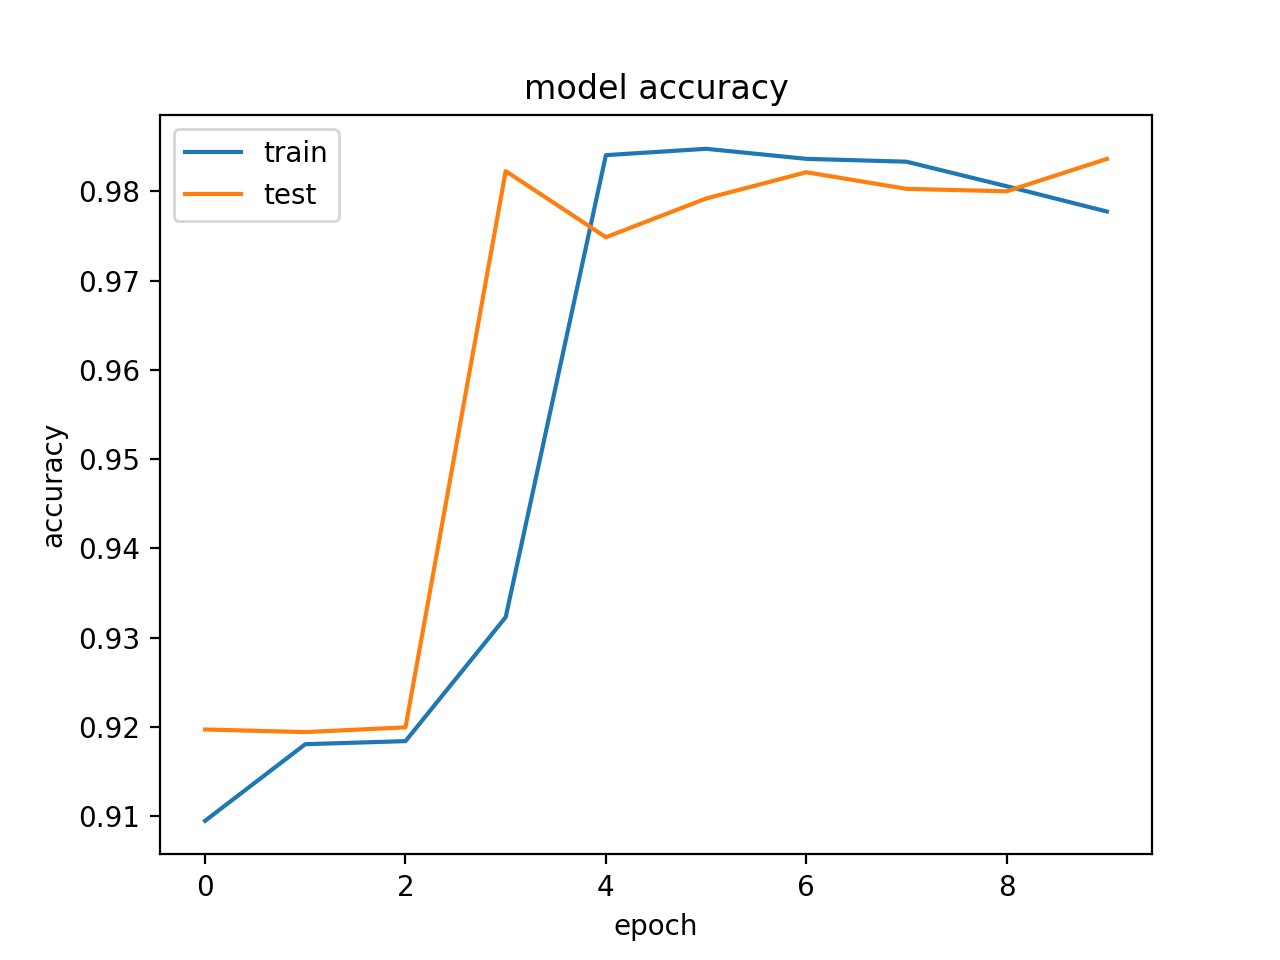

In [6]:
plot_performance(history)

In [7]:
from models import make_accuracy_matrix_plot

<IPython.core.display.Javascript object>


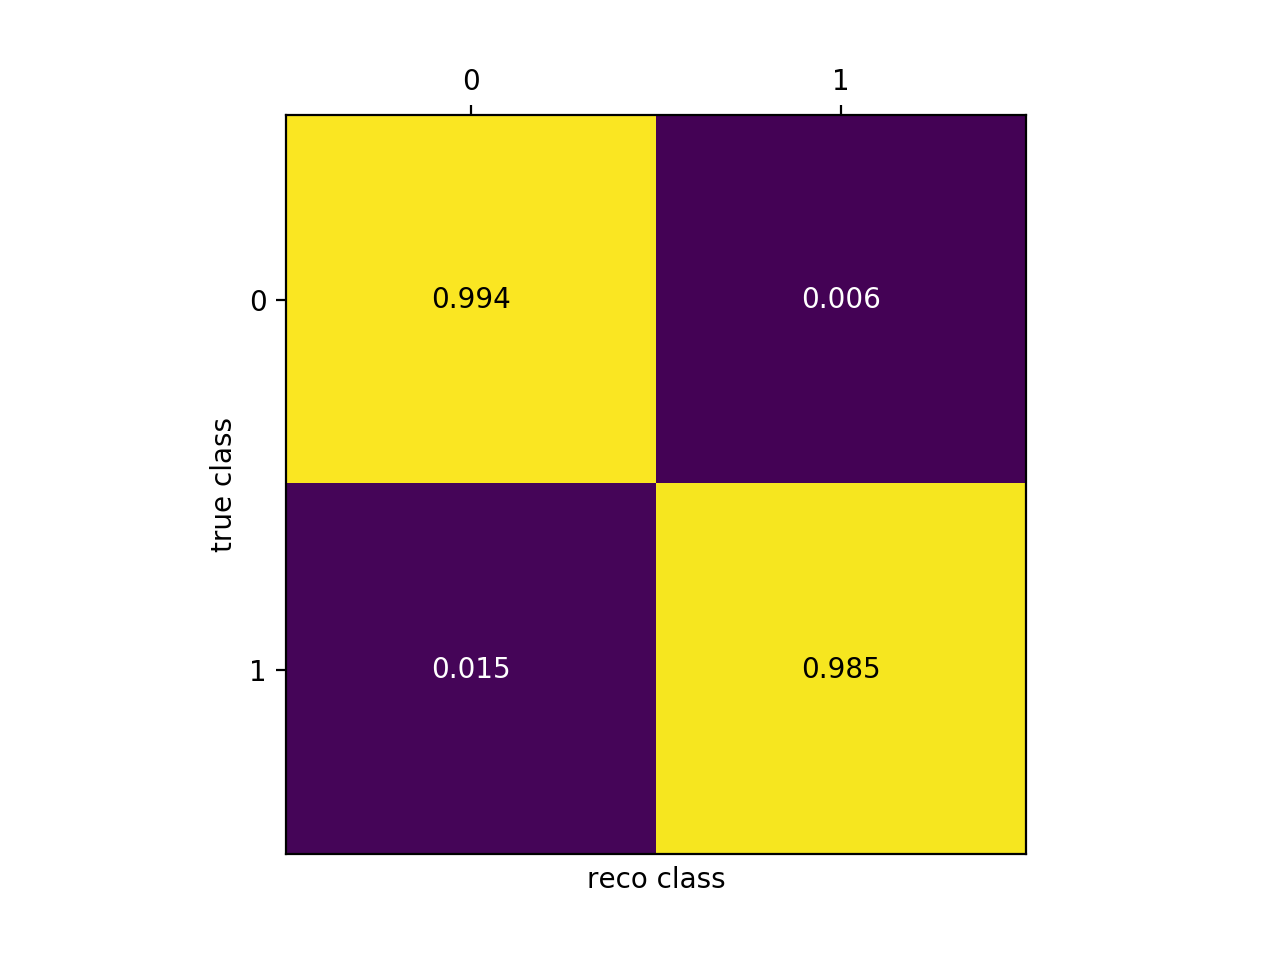

<IPython.core.display.Javascript object>


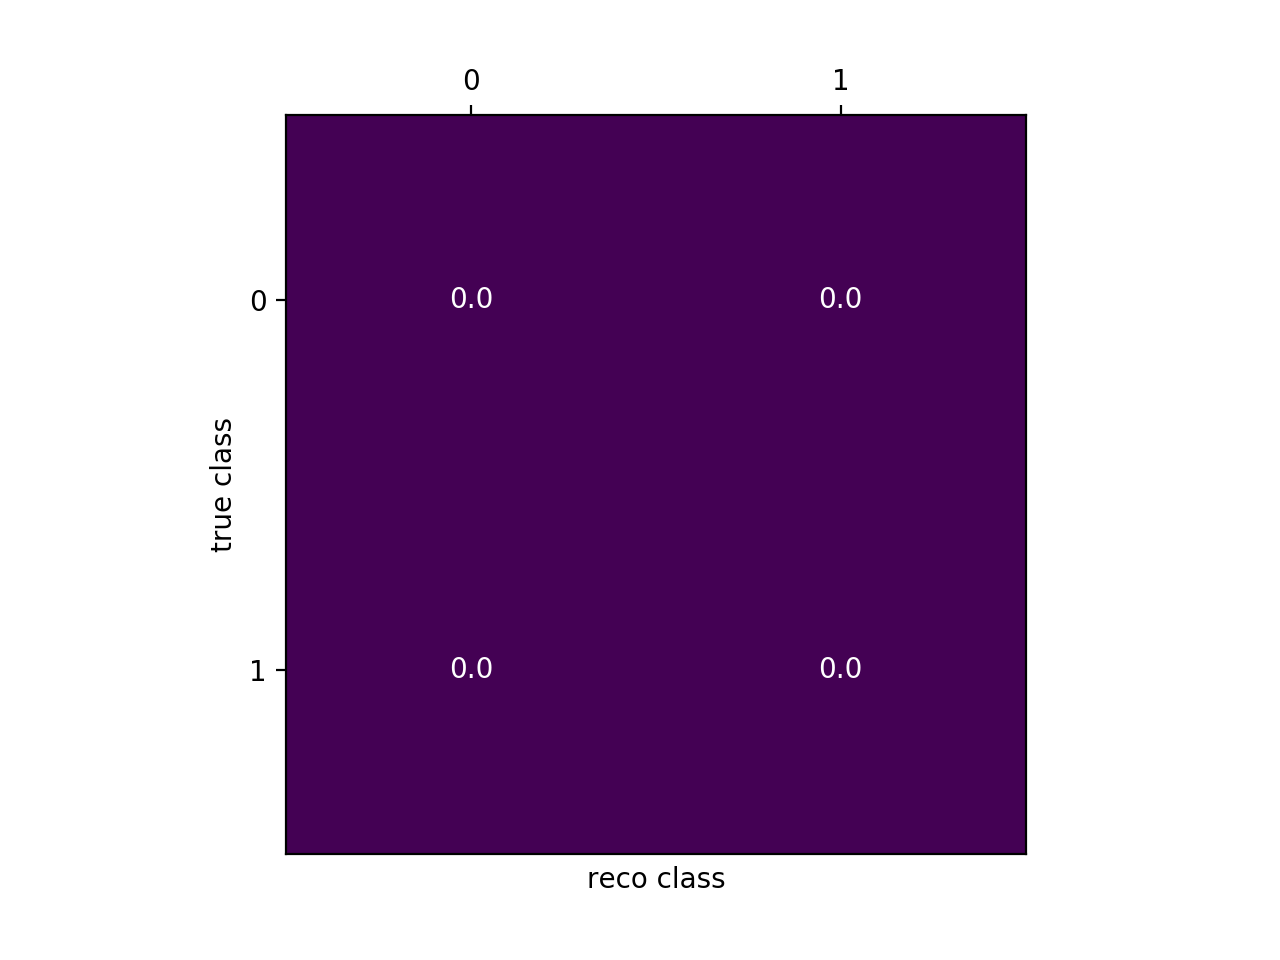

In [8]:
make_accuracy_matrix_plot(model, validate_generator)
make_accuracy_matrix_plot(model, validate_generator, ref='ref')


# X_trial, y_trial, = next(validate_generator)
# res = model.predict(X_trial)

# def decode(value):
#     return np.argmax(value, axis=-1)

# y = decode(y_trial)
# res = decode(res)


# import matplotlib as mpl

# res_matrix = np.zeros((2,2))

# for i, true_label in enumerate(set(y)):
#     for j, reco_label in enumerate(set(y)):
#         mask_true = y==true_label
#         mask_reco = res==reco_label
#         res_matrix[i,j] = np.sum(mask_true*mask_reco) / np.sum(mask_true)

# plt.figure()
# im = plt.matshow(res_matrix, norm=mpl.colors.Normalize(vmin=0., vmax=1.))
# for i in range(res_matrix.shape[0]):
#     for j in range(res_matrix.shape[0]):
#         if res_matrix[i, j]>0.5:
#             color = 'k'
#         else:
#             color = 'w'
#         text = plt.text(j, i, np.round(res_matrix[i, j], decimals=3), ha='center', va='center', color=color)
# plt.colorbar(im)
# plt.show()

In [9]:
save_dir = 'plots'
if not os.path.exists(save_dir):
        os.makedirs(save_dir)

second_dir = 'simple'
save_dir = os.path.join(save_dir, second_dir)  
if not os.path.exists(save_dir):
        os.makedirs(save_dir)




In [10]:
X = X_val
y = np.argmax(Y_val, axis=1)
t = np.arange(X.shape[0])

n_slices = X.shape[0] - n_hidden

all_y = np.zeros((n_slices, 2))

for i in range(n_slices):
    x_input = np.reshape(X[i:i+n_hidden], (1, n_hidden, 1))
    all_y[i] = model.predict(x_input)
    
y_pred_int = np.argmax(all_y, axis=1)

y_res = np.zeros_like(t)
y_res[int(n_hidden/2):int(-n_hidden/2)] = y_pred_int

<IPython.core.display.Javascript object>


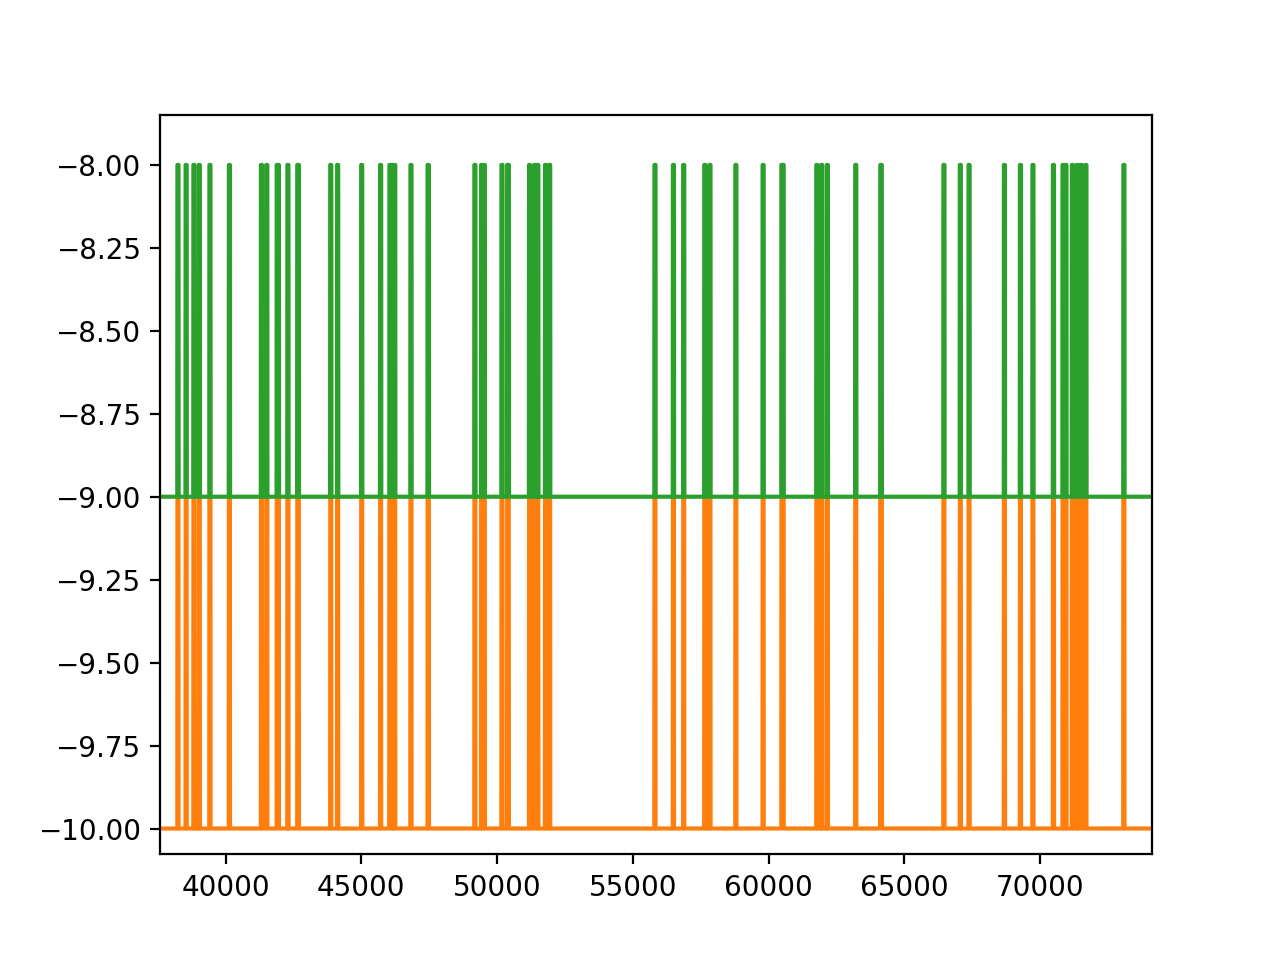

In [12]:
plt.figure()
plt.plot(t, X)
plt.plot(t, y-10, )
plt.plot(t, y_res-9)
# plt.xlim(100, 500)
plt.show()